## Ingesta de datos desde archivos Excel

### Exploración

1. Importación de librerías

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Asignación de datos a un dataframe crudo y exploración de las primeras 5 filas con **.head()**

In [20]:
df_raw = pd.read_excel('../_raw/eaf_24.xlsx')

df_raw.head()

,start_date,stop_date,heat_id,steel_grade,buckets,total_scrap_t,bucket1_t,bucket2_t,bucket3_t,bucket4_t,...,tapping_lime_kg,tapping_dolo_kg,tapping_cal_mezcla_kg,tapping_CaF2_kg,tapping_Al_kg,tapping_FeSi_kg,tapping_FeSiMn_kg,tapping_FeMn_kg,tapping_SiC_kg,tapping_carbon_kg
0,2024-01-01 23:35:48,2024-01-02 00:38:16,35024773,SAE 1011,3,100.390,47.500,32.500,20.39,0,...,340,152,0,75,0,92,675,0,0,0
1,2024-01-02 00:38:20,2024-01-02 01:44:44,35024774,SAE 1011,2,78.151,45.572,32.579,0.00,0,...,338,154,0,75,0,90,678,0,0,0
2,2024-01-02 01:44:48,2024-01-02 03:04:50,35024775,SAE 1011,2,77.854,45.776,32.078,0.00,0,...,339,153,0,75,0,98,680,0,0,0
3,2024-01-02 03:04:54,2024-01-02 03:56:56,35024776,SAE 1011,2,78.156,46.475,31.681,0.00,0,...,339,154,0,77,0,92,673,0,0,0
4,2024-01-02 03:57:02,2024-01-02 04:43:22,35024777,SAE 1011,2,77.257,46.076,31.181,0.00,0,...,339,154,0,77,0,91,684,0,0,0


3. Extraemos datos relevantes con ayuda de **.info()**

In [21]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154 entries, 0 to 2153
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   start_date              2154 non-null   datetime64[ns]
 1   stop_date               2154 non-null   datetime64[ns]
 2   heat_id                 2154 non-null   int64         
 3   steel_grade             2154 non-null   object        
 4   buckets                 2154 non-null   int64         
 5   total_scrap_t           2154 non-null   float64       
 6   bucket1_t               2154 non-null   float64       
 7   bucket2_t               2154 non-null   float64       
 8   bucket3_t               2154 non-null   float64       
 9   bucket4_t               2154 non-null   int64         
 10  coke_kg                 2154 non-null   int64         
 11  lime_kg                 2154 non-null   int64         
 12  dolo_kg                 2154 non-null   int64   

4. Armamos un dataframe limpio eliminando las columnas que no nos interesan

In [24]:
drop_columns = [
    'start_date',
    'stop_date',
    'heat_id',
    'bucket1_t',
    'bucket2_t',
    'bucket3_t',
    'bucket4_t',
    'duration',
    'p_on_min',
    'p_off_min',
    'energy1_MWh',
    'energy2_MWh',
    'energy3_MWh',
    'energy4_MWh',
    'energy_refining_MWh',
    'tap_duration',
    'furn_Ar_stirr_Nm3',
    'furn_N2_stirr_Nm3',
    'ladle_Ar_stirr_Nm3',
    'ladle_N2_stirr_Nm3',
    'tapping_lime_kg',
    'tapping_dolo_kg',
    'tapping_cal_mezcla_kg',
    'tapping_CaF2_kg',
    'tapping_Al_kg',
    'tapping_FeSi_kg',
    'tapping_FeSiMn_kg',
    'tapping_FeMn_kg',
    'tapping_SiC_kg',
    'tapping_carbon_kg',
]
df = df_raw.drop(drop_columns, axis='columns')

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154 entries, 0 to 2153
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   steel_grade             2154 non-null   object 
 1   buckets                 2154 non-null   int64  
 2   total_scrap_t           2154 non-null   float64
 3   coke_kg                 2154 non-null   int64  
 4   lime_kg                 2154 non-null   int64  
 5   dolo_kg                 2154 non-null   int64  
 6   avg_power_MW            2154 non-null   float64
 7   energy_MWh              2154 non-null   float64
 8   O2_module_Nm3           2154 non-null   int64  
 9   O2_total_Nm3            2154 non-null   int64  
 10  C_module_kg             2154 non-null   int64  
 11  fuel_module_Nm3         2154 non-null   int64  
 12  fuel_total_Nm3          2154 non-null   int64  
 13  spec_energy_kWh/tls     2154 non-null   float64
 14  spec_O2_module_Nm3/tls  2154 non-null   

5. Ahora extraemos un sub-dataframe para SAE 1022 fabricado a 2 cestas y verificamos que no haya valores nulos

In [30]:
df_1022 = df[df['steel_grade'] == 'SAE 1022']
df_1022 = df_1022[df_1022['buckets'] == 2]
df_1022.isnull().sum()

steel_grade               0
buckets                   0
total_scrap_t             0
coke_kg                   0
lime_kg                   0
dolo_kg                   0
avg_power_MW              0
energy_MWh                0
O2_module_Nm3             0
O2_total_Nm3              0
C_module_kg               0
fuel_module_Nm3           0
fuel_total_Nm3            0
spec_energy_kWh/tls       0
spec_O2_module_Nm3/tls    0
spec_C_module_kg/tls      0
spec_fuel_Nm3/tls         0
spec_C_kg/tls             0
spec_dolo_kg/tls          0
final_temp_°C             0
final_O2_ppm              0
end_hot_heel_t            0
tapped_weight_tls         0
tapped_steel_only_t       0
yield                     0
dtype: int64

6. Graficamos la distribución de nuestros valores numéricos

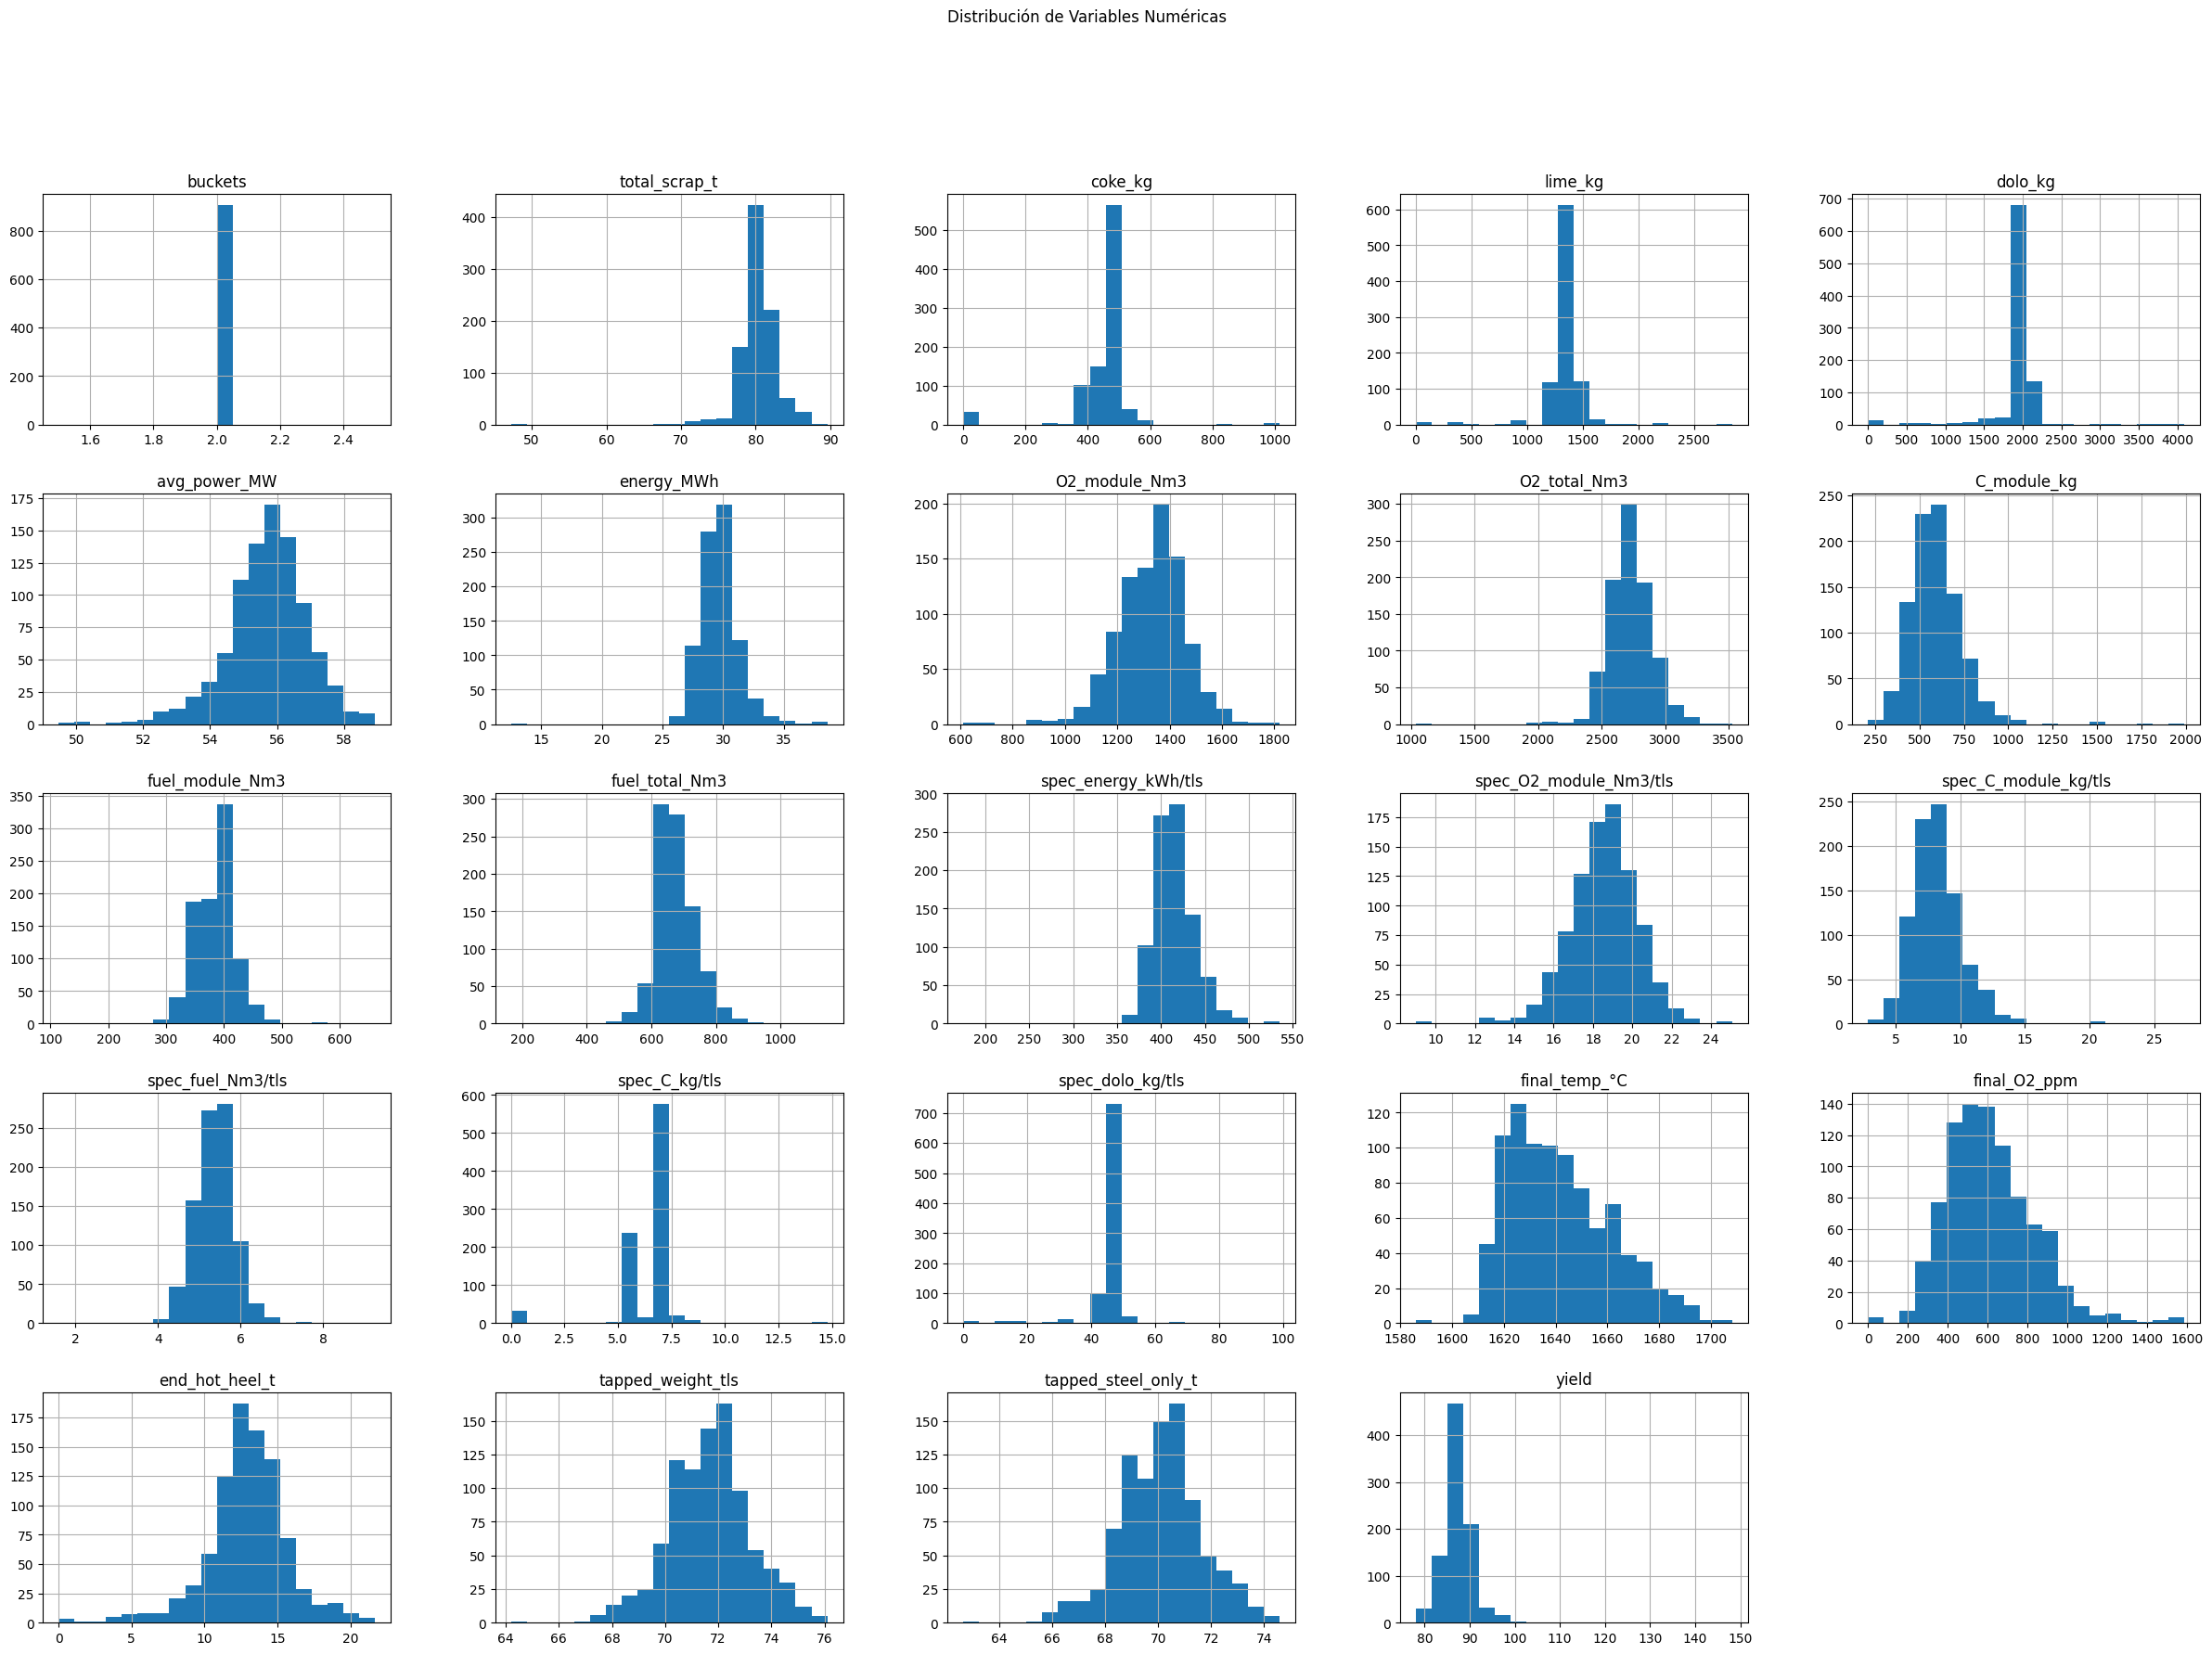

In [32]:
df_1022.hist(bins=20, figsize=(30,20))
plt.suptitle('Distribución de Variables Numéricas')
plt.show()

7. Probamos graficar una matriz de correlación de variables numéricas

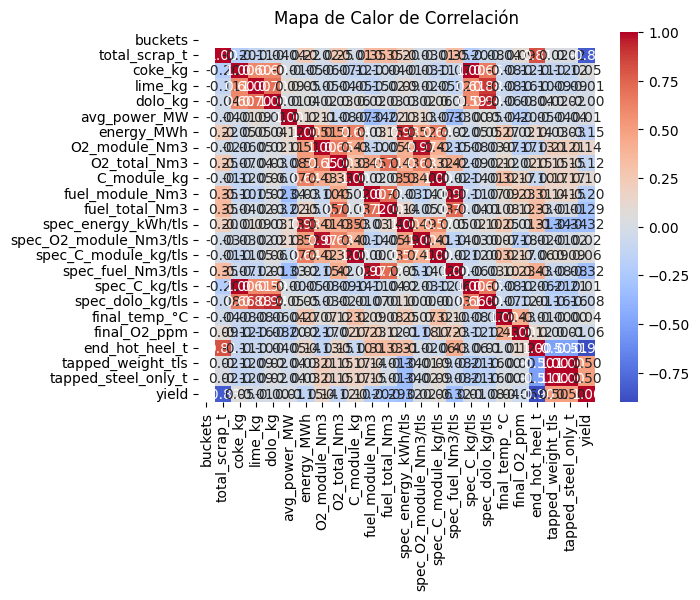

In [33]:
corr = df_1022.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Mapa de Calor de Correlación')
plt.show()

> *Será necesario reducir la dimensionalidad de esta matriz. Mientras tanto veamos los valores únicos por columna*

In [34]:
df_1022.nunique()

steel_grade                 1
buckets                     1
total_scrap_t             773
coke_kg                    56
lime_kg                   122
dolo_kg                   168
avg_power_MW              873
energy_MWh                152
O2_module_Nm3             408
O2_total_Nm3              469
C_module_kg               423
fuel_module_Nm3           163
fuel_total_Nm3            256
spec_energy_kWh/tls       838
spec_O2_module_Nm3/tls    885
spec_C_module_kg/tls      887
spec_fuel_Nm3/tls         822
spec_C_kg/tls             535
spec_dolo_kg/tls          818
final_temp_°C              90
final_O2_ppm              438
end_hot_heel_t            848
tapped_weight_tls          86
tapped_steel_only_t       800
yield                     905
dtype: int64

8. Vamos a graficar distribuciones de variables específicas, en este ejemplo la Energía en MWh

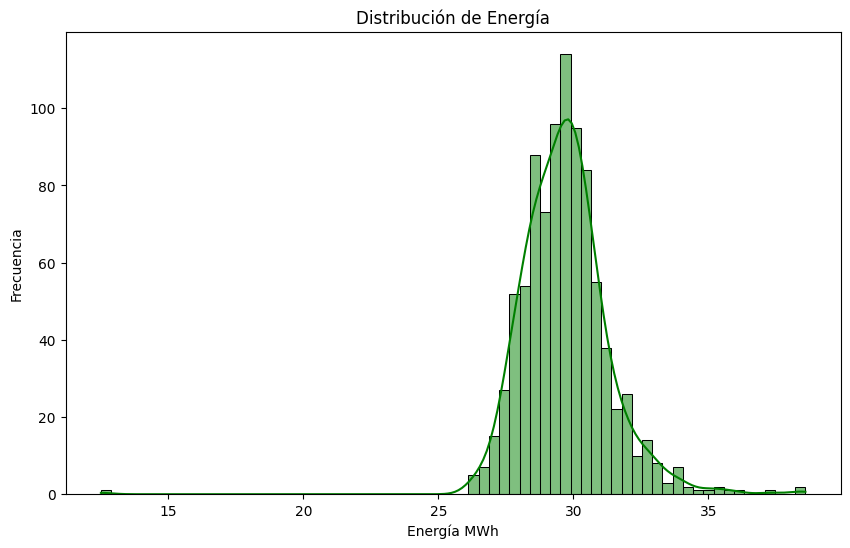

In [35]:
if 'energy_MWh' in df_1022.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df_1022['energy_MWh'], kde=True, color='green')
    plt.title('Distribución de Energía')
    plt.xlabel('Energía MWh')
    plt.ylabel('Frecuencia')
    plt.show()

9. Finalmente vamos a verificar la existencia de **Outliers** con ayuda de un **boxplot**

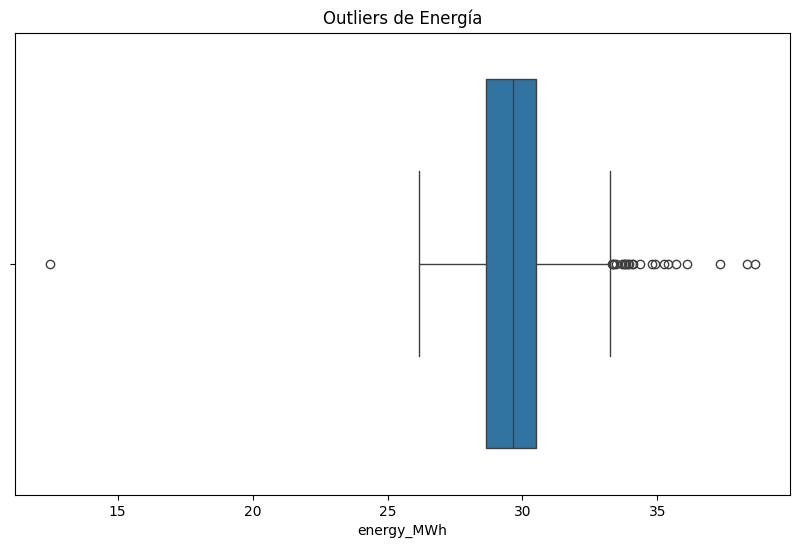

In [36]:
if 'energy_MWh' in df_1022.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df_1022['energy_MWh'])
    plt.title('Outliers de Energía')
    plt.show()